<a href="https://colab.research.google.com/github/fahimabrar/Machine-Learning/blob/main/Unsupervised%20Learning/Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principal Component Analysis**
## PCA is a technique, for dimension reduction while keeping the maximum number of information.

Analogy: A photograph is a two-dimensional representation of three-dimensional objects. Taking a photo is kind of converting three dimension data into two dimentioanal space. 

A good photographer will try to capture the photo with maximum details (e.g maximum number of people’s faces) (That is reduction of dimension at the same time keeping the maximum information). 

The objective of PCA is a transforming data into lower dimensions with high details. **Two steps can be followed to do PCA,** 
 


### **Step 1:** Represent the data into a better way

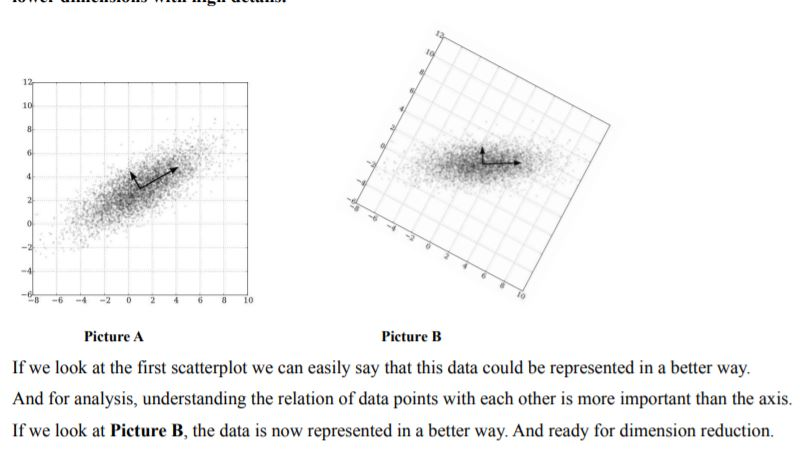

### **Step 2**: Project High dimensional data into lower space




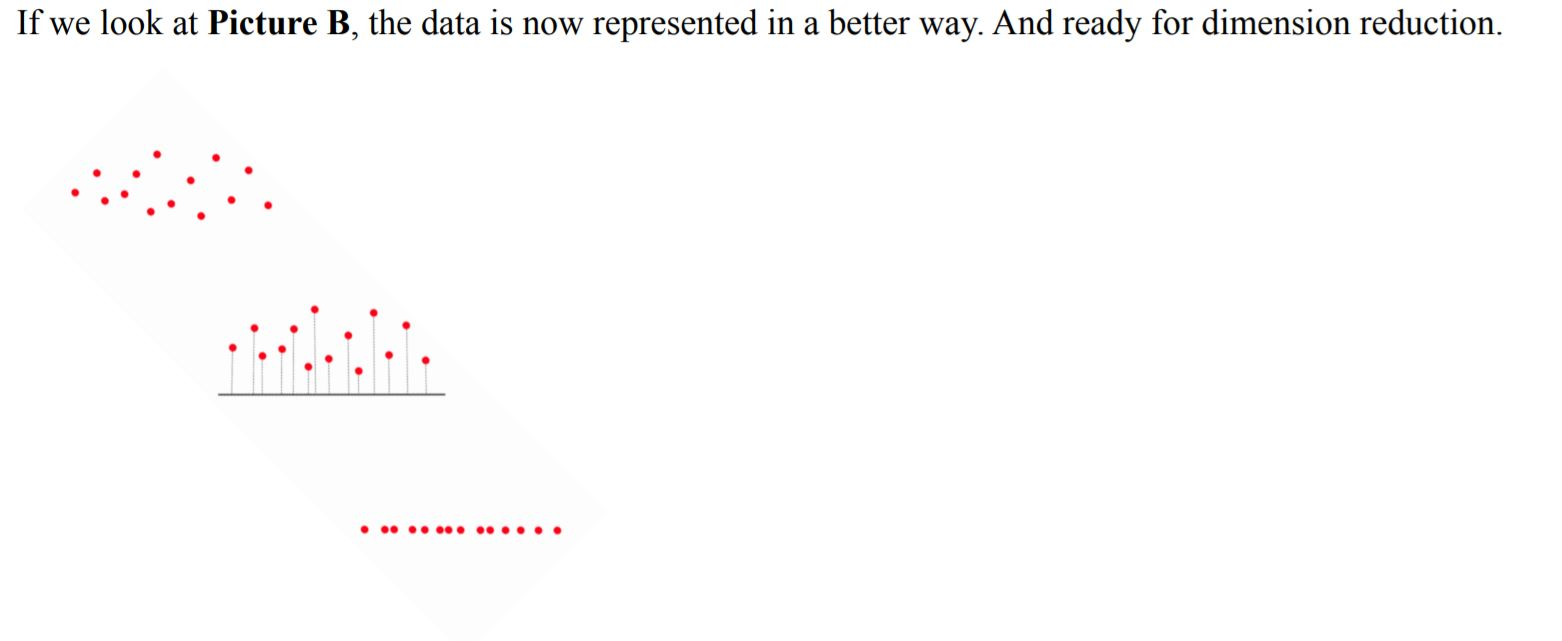

## Benefits of Using PCA

- As data is converted into lower space it will reduce the computation cost
- Noise will be removed from the data and signal will be increased
- We cannot visualize data that is more than three Dimension. We can apply PCA on high dimension data and visualize it for getting an intuition of how it is represented

## For deep understanding of PCA theory <a href = "https://www.youtube.com/watch?v=g-Hb26agBFg">PCA - Luis Serrano (video)</a>

# **Lets do Coding.....**

In [ ]:
#Lets get the breast cancer data from the scikit learn dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
# these are the columns in the dataset
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

#### we can see there are lots of features and we cannot visualize that many features in our 2D/3D world

In [ ]:
import numpy as np

print(np.unique(cancer.target))

cancer.target_names

[0 1]


array(['malignant', 'benign'], dtype='<U9')

### we can see there are two unique values for target variables. So it is basically a binary classification problem. We need to visualize the data so that we can understand which algorithm can be a well fit to this problem. Or gathering some more intuition to taking an approach for solving the problem


In [ ]:
# Lets convert the data into a pandas dataframe
import pandas as pd

data = pd.DataFrame(cancer.data)

In [ ]:
data.columns = cancer.feature_names
data.shape

(569, 30)

In [ ]:
data.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# We will apply PCA on this data and then visualize it

**Lets scale the data first.** sklearn scale will transform the data into single scale (Center to the mean and component wise scale to unit variance)

More, <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html"> Scikit Learn - Scale </a>

Why scaling is important (before doing PCA), <a href = "https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35#:~:text=Feature%20scaling%20is%20essential%20for,that%20calculate%20distances%20between%20data.&text=Since%20the%20range%20of%20values,not%20work%20correctly%20without%20normalization"> All about Feature Scaling</a>


In [ ]:
from sklearn.preprocessing import scale
scaled_data = scale(data)

In [ ]:
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

#PCA

In [ ]:
from sklearn import decomposition

In [ ]:
pca = decomposition.PCA(n_components = 3)
# n_components means number of principal component we want to get
pca.fit(scaled_data)
scores = pca.transform(scaled_data)
df = pd.DataFrame(scores, columns=["PC1", "PC2", "PC3"])
df

,PC1,PC2,PC3
0,9.192837,1.948583,-1.123167
1,2.387802,-3.768172,-0.529294
2,5.733896,-1.075174,-0.551748
3,7.122953,10.275589,-3.232790
4,3.935302,-1.948072,1.389767
...,...,...,...
564,6.439315,-3.576817,2.459486
565,3.793382,-3.584048,2.088476
566,1.256179,-1.902297,0.562731
567,10.374794,1.672010,-1.877028


In [ ]:
loadings = pca.components_.T
df_loadings = pd.DataFrame(loadings, columns = ['PC1', 'PC2', 'PC3'], index = cancer.feature_names)
df_loadings

,PC1,PC2,PC3
mean radius,0.218902,-0.233857,-0.008531
mean texture,0.103725,-0.059706,0.064550
mean perimeter,0.227537,-0.215181,-0.009314
mean area,0.220995,-0.231077,0.028700
mean smoothness,0.142590,0.186113,-0.104291
mean compactness,0.239285,0.151892,-0.074091
mean concavity,0.258400,0.060165,0.002734
mean concave points,0.260854,-0.034768,-0.025564
mean symmetry,0.138167,0.190349,-0.040240
mean fractal dimension,0.064363,0.366575,-0.022574


In [ ]:
explained_ratio = pca.explained_variance_ratio_.tolist()
explained_ratio

[0.44272025607526416, 0.18971182044029955, 0.093931632571332]

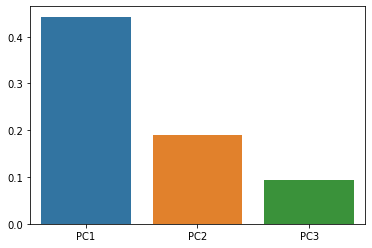

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.barplot(x=["PC1", "PC2", "PC3"], y=explained_ratio)

In [ ]:
0.4427202560752636 + 0.1897118204403301 + 0.09

0.7224320765155937

# If we keep only first two Principal Component we will get 63 percent of variance, If we keep three PC component we will get 72 percent of variance of the data.

# Let us visualize First two column to see the relation between data. It will give us some insights.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


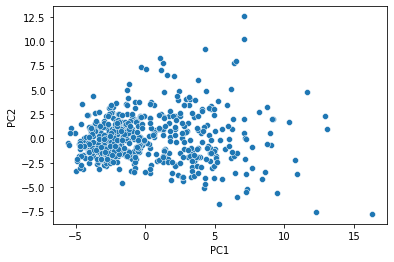

In [ ]:
ax = sns.scatterplot(df.PC1, y=df.PC2)

# Let add some color based on the target variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


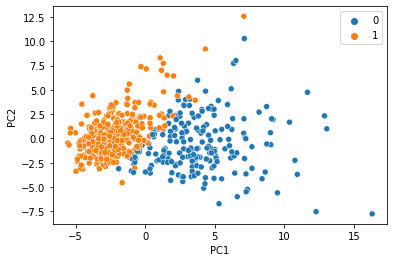

In [ ]:
ax = sns.scatterplot(df.PC1, y=df.PC2, hue=cancer.target)

Text(0.5, 0, 'PC3')

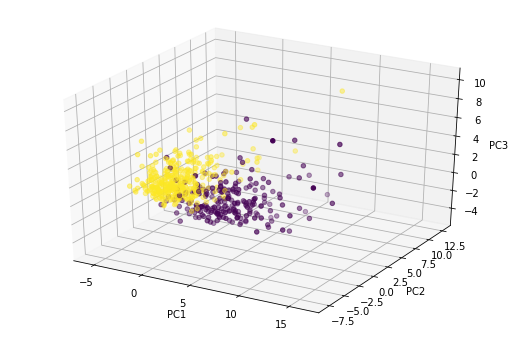

In [ ]:
fig = plt.figure(figsize=(9, 6))
# Create 3D container
ax = plt.axes(projection = '3d')
# Visualize 3D scatter plot
ax.scatter3D(df.PC1, df.PC2, df.PC3, c = cancer.target)
# Give labels
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
# Save figure
#plt.savefig('3d_scatter.png', dpi = 300);

Here 0 is for 'malignant' and 1 is for 'benign' Cancer

# From 2D (PC1, PC2) and 3D(PC1, PC2, PC3) plot we can see data is seperable. And **Malignent** and **Benign** Cancer are very different from each other (mostly). 

# In this notebook we covered,

- Little intuitions behind PCA
- Load the dataset from sklearn dataset
- Scaled the independent varaibles
- Applied PCA with 3 components
- See how much variance is covered with which Principle Component
- Visualized the data with seaborn

# **Thank You**
### <a href = "https://www.linkedin.com/in/abrar-fahim/">-Abrar</a>